## Méthode de tir pour résoudre le système d’optimalité (Eq. 10), en dimension 1

**But.** Pour $A\in\mathbb{R}$, $G\in\mathbb{R}$, $C\in\mathbb{R}$, et $q_1,q_2>0$ des pondérations, construire le couple optimal
\begin{aligned}
h^\star(t) &= -\tfrac{1}{q_2} G_2^\top p(t),\\
z(0) &= -\tfrac{1}{q_1} p(0)
\end{aligned}
où $(z,p)$ est solution du système d’optimalité donné par le TPBVP:
\begin{aligned}
z'(t) &= A z(t) + G h^\star(t) = A z(t) - \tfrac{1}{q_2} G G^\top p(t), \quad z(0) = -\tfrac{1}{q_1} s,\\
p'(t) &= -A^\top p(t) - C^\top\!\big(C z(t) - y^{\mathrm m}(t)\big), \quad p(T)=0,
\end{aligned}
et $s := p(0)\in\mathbb{R}^n$ est **l’inconnue de tir**. 

---

### Principe de résolution par tir exact (pseudo-code)
1. Give input data 
    - System: A, G2, C
    - Objective: z0, h as known
    - Time discretization: T, N
    - Regulations: q1, q2
2. Forward z_true and y_m from known z0 and h
    - Integrate $z'(t) = A z(t) + G2 h(t)$ using RK4 over grid t
    - Then compute $Y(t) = C z(t)$
3. Backward p and z from y_m with shooting method on p(0)
    - Define a function that integrate $(z'(t), p'(t))$ with $z(0) = -s/q1$, $p(T) = 0$ under the shoot $s=p(0)$.
    - Define the shooting function $F(s) := p(T; s)$ and find the good $s^\star$ such that $F(s^\star)=0$ by multiple integrations with $s$.
    - Integrate final (z, p) with the good $s^\star$.
4. Reconstruction of the irrigation h
    - $h(t) = -(1/q2) * G2^T p(t)$
    - $z(0) = -(1/q1) * p(0)$
5. Make plots and metrics
    - Metrics: 
        - $z_0 - z_0estimated$
        - $RMSE_z = \sqrt{mean((z_{true} - z_{estimated})^2)}$
        - $RMSE_h = \sqrt{mean((z_{true} - z_{estimated})^2)}$
        - $Y Misfit = \int_0^T \|Cz(t)-y^m(t)\|^2 dt$
        - $H Energy = \int_0^T \|h(t)\|^2 dt$
    - Plots:
        - $z_{true}$ vs $z_{estimated}$
        - $h_{true}$ vs $h_{estimated}$
        - $z_{estimated}$ as function of q2
        - $h_{estimated}$ as function of q2
        - $RMSE_z$ as function of q2
        - $RMSE_h$ as function of q2
        - $Y Misfit$ as function of q2
        - $H Energy$ as function of q2

---

### Input example
- System: A=2, G2=3, C=4.9
- Objective: z0=4, h(t)=t(1 - t)
- Time discretization: T=1, N=200
- Regulations: q1=1, q2=1

---

### Ouput example (metrics)
z0 true = 4, z0 estimated = 2.617, error = 1.383<br>
RMSE(z) = 10.881<br>
RMSE(h) = 1.430<br>
Y Misfit = 1.466<br>
h Energy = 2.108

In [1]:
# Importations des modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Import steps 1-5 functions
from functions_n1 import *

In [3]:
# Data input
# System parameters
n = 1
A = 2
G2 = 3
C = 4.9

# Objective
z0 = 4                      # supposed know
h = lambda t : t * (1 - t)  # supposed know


# Regulation parameters
q1 = 1
q2 = 1

# Time discretization
T = 1
N = 200
t  = np.linspace(0, T, N+1)

In [4]:
# Simulation for q1 and q2 (step 1 to 4)
h_true, z_true, y_m, z0_est, z_est, h_est = simulate_n1(A, G2, C, z0, h, T, N, q1, q2)

In [5]:
# showing true vs estimated
df = pd.DataFrame({"t": t, 'h_true': h_true, 'h_est': h_est[:, 0], 'z_true': z_true, 'z_est': z_est[:, 0], 'y_m': y_m})
display(df)

,t,h_true,h_est,z_true,z_est,y_m
0,0.000,0.000000,7.849720e+00,4.000000,2.616573,19.600000
1,0.005,0.004975,7.272981e+00,4.040238,2.760485,19.797167
2,0.010,0.009900,6.739348e+00,4.080955,2.897184,19.996681
3,0.015,0.014775,6.245620e+00,4.122155,3.027246,20.198562
4,0.020,0.019600,5.788832e+00,4.163843,3.151203,20.402830
...,...,...,...,...,...,...
196,0.980,0.019600,3.836584e-02,29.837870,29.814138,146.205564
197,0.985,0.014775,2.943515e-02,30.138005,30.112855,147.676224
198,0.990,0.009900,2.008312e-02,30.441083,30.414425,149.161306
199,0.995,0.004975,1.028152e-02,30.747133,30.718871,150.660952


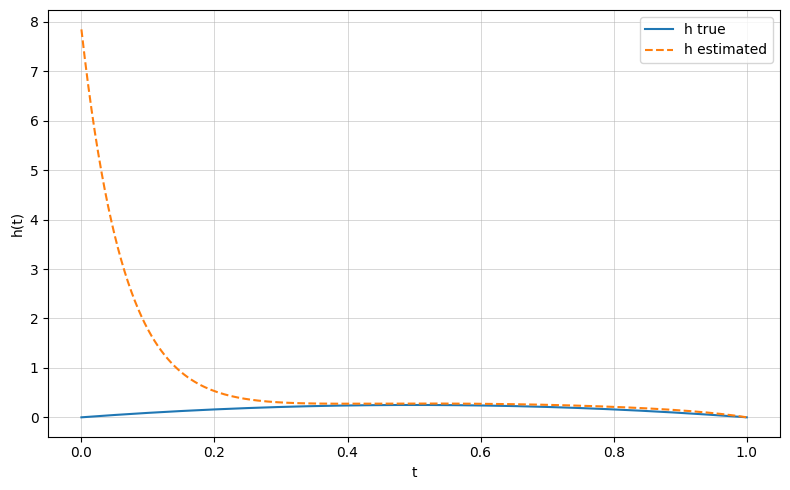

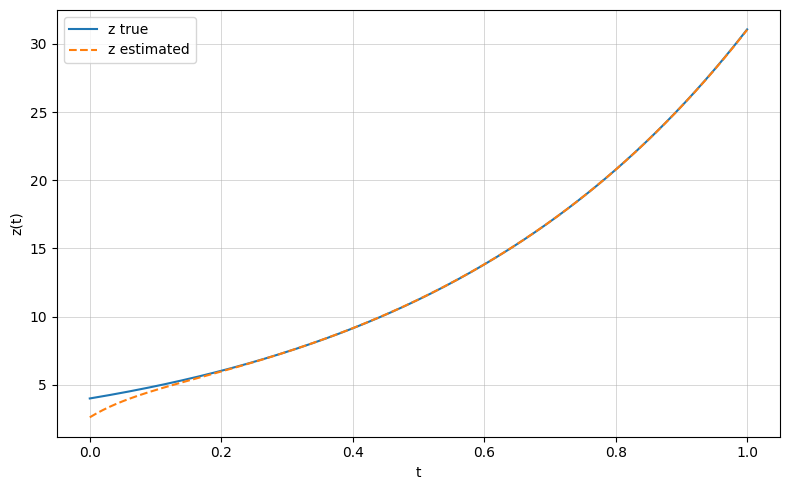

In [6]:
# Step 5: quick plots
plots(h_true, z_true, y_m, z0_est, z_est, h_est, t, save=False, outdir = "figs")

In [7]:
# Step 5: metrics
z0_error, z0_energy, z_rmse, h_rmse, misfit, energy = compute_metrics(C, z0, h_true, z_true, y_m, z0_est, z_est, h_est, t)
print("===== Résultats =====")
print(f"z0 true = {z0}, z0 estimated = {z0_est:.3f}, error = {z0_error:.3f}")
print(f"RMSE(z) = {z_rmse:.3f}")
print(f"RMSE(h) = {h_rmse:.3f}")
print(f"Misfit = {misfit:.3f}")
print(f"Energy = {energy:.3f}")

===== Résultats =====
z0 true = 4, z0 estimated = 2.617, error = 1.383
RMSE(z) = 10.881
RMSE(h) = 1.430
Misfit = 1.466
Energy = 2.108


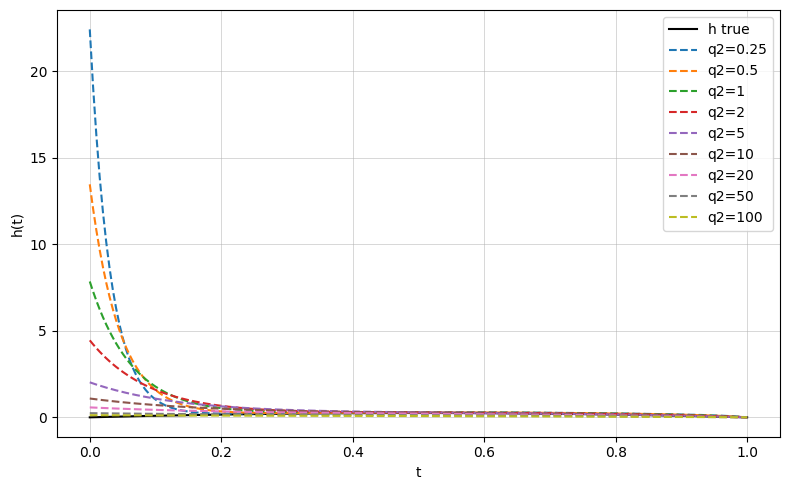

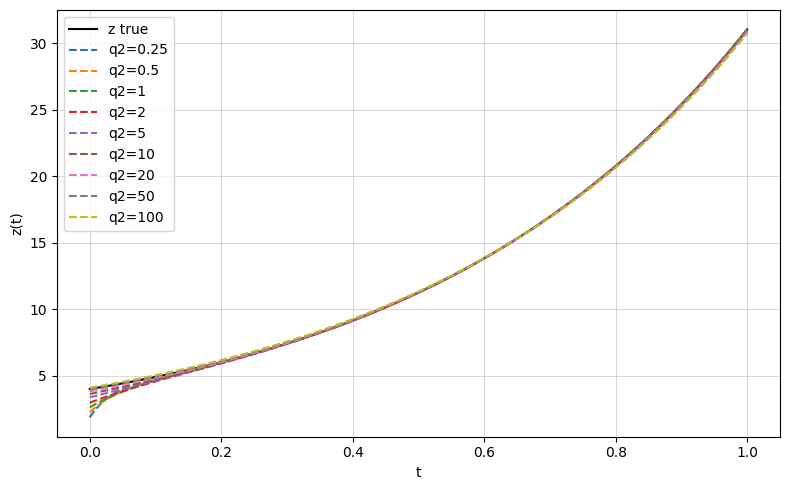

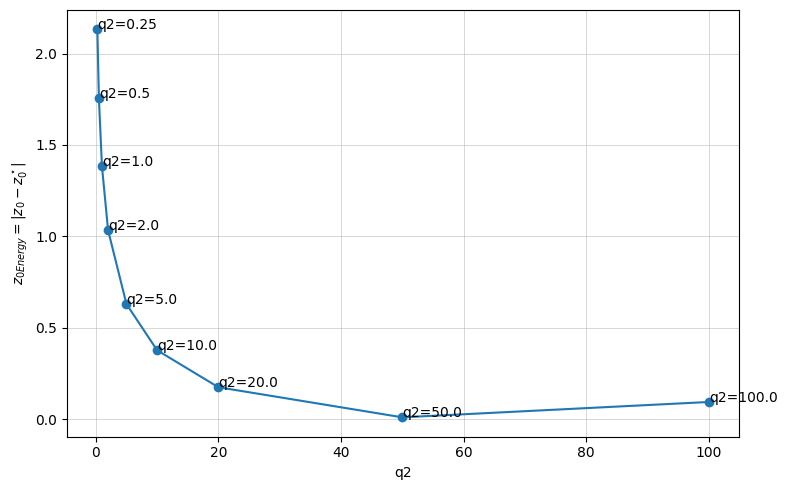

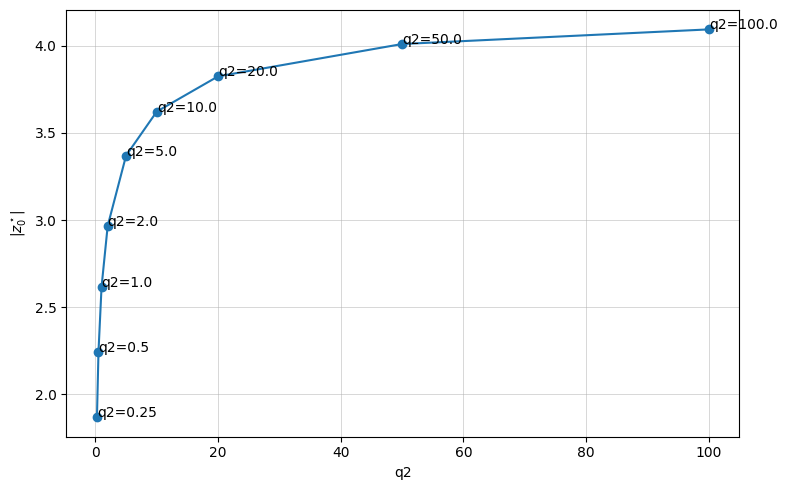

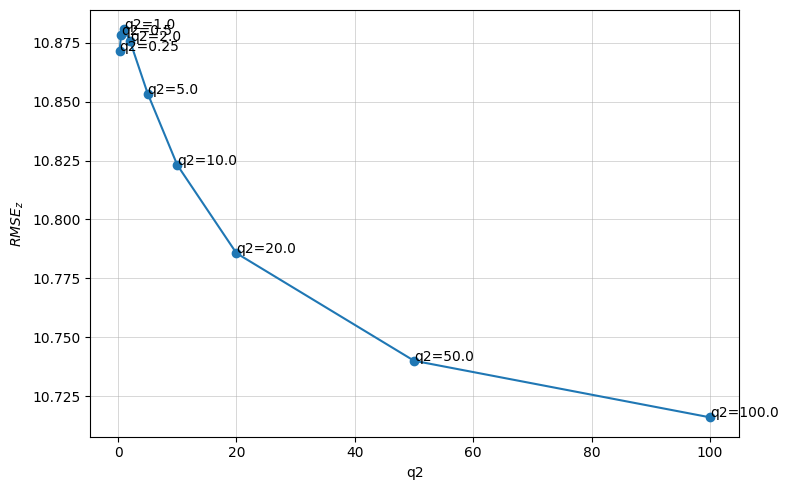

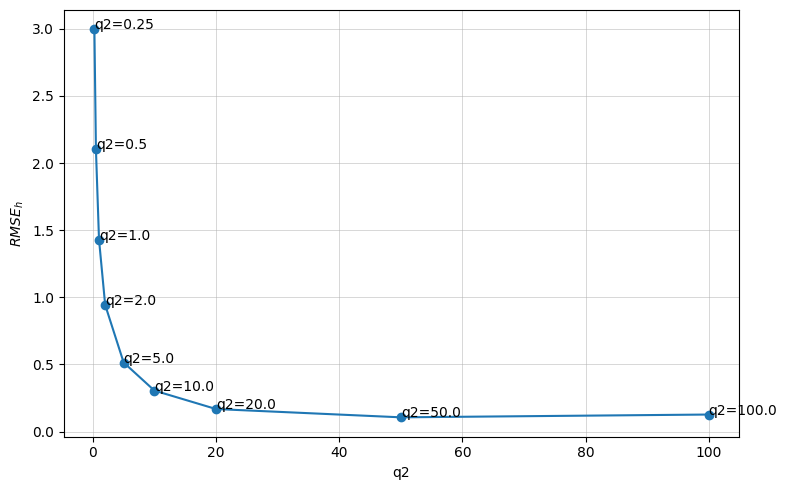

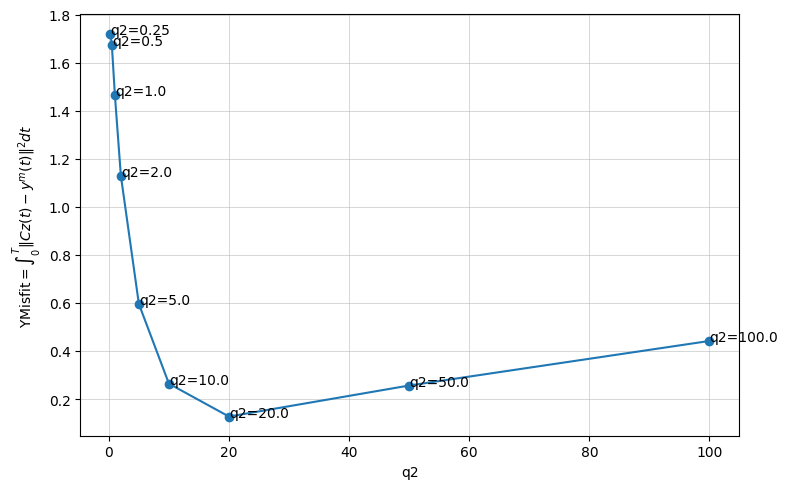

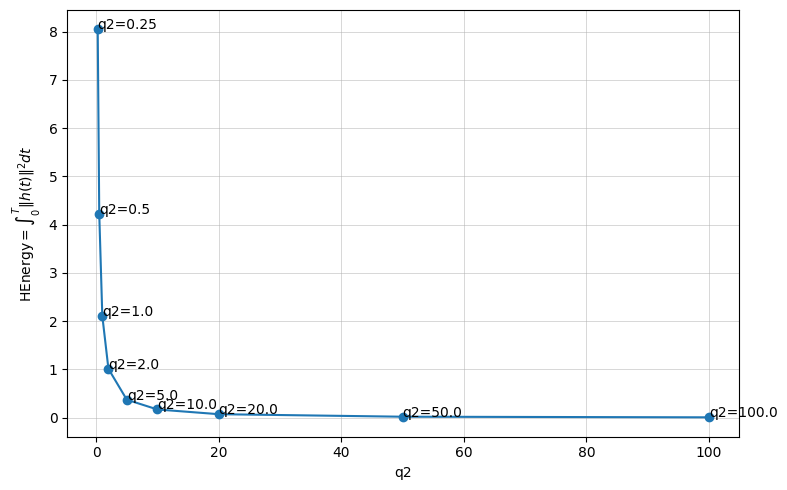

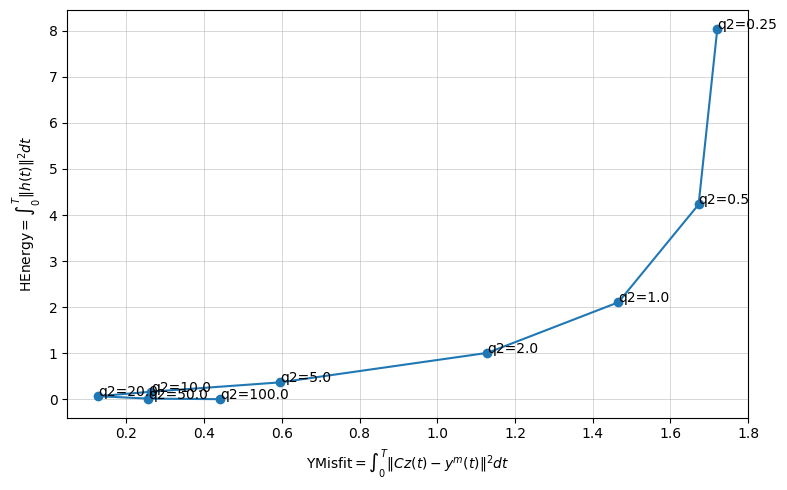

In [8]:
# Sensibility of q2: sweep q2, compute solutions & metrics
q1 = 1.0
#q2_list = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
q2_list = [0.25, 0.5, 1, 2, 5, 10, 20, 50, 100]
#q2_list = [0.25, 0.5, 1.0, 2.0, 5.0, 10.0]

curves_z, curves_h, metrics = q2_sensibility(A, G2, C, z0, h, T, N, q1, q2_list, save=False, outdir = "figs")

In [9]:
metrics

,q2,z0_error,z0_energy,z_rmse,h_rmse,misfit,energy
0,0.25,2.132053,1.867947,10.871347,2.995246,1.720703,8.047111
1,0.50,1.756188,2.243812,10.878243,2.100953,1.672484,4.229886
2,1.00,1.383427,2.616573,10.880672,1.430302,1.466105,2.108117
3,2.00,1.033683,2.966317,10.875838,0.943256,1.128972,1.010674
4,5.00,0.629801,3.370199,10.853451,0.514575,0.595370,0.370692
5,10.00,0.377284,3.622716,10.823105,0.305353,0.263966,0.168408
6,20.00,0.175019,3.824981,10.785681,0.168107,0.127066,0.070809
7,50.00,0.010499,4.010499,10.740029,0.106328,0.256310,0.018436
8,100.00,0.094417,4.094417,10.716010,0.127116,0.441740,0.005721


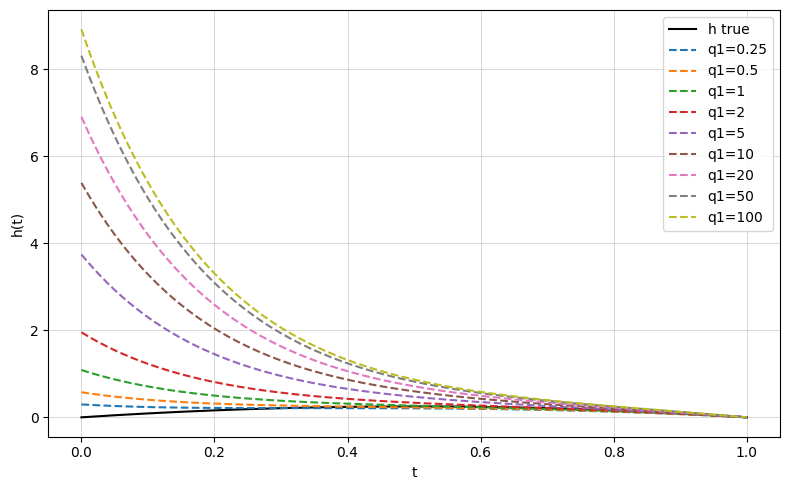

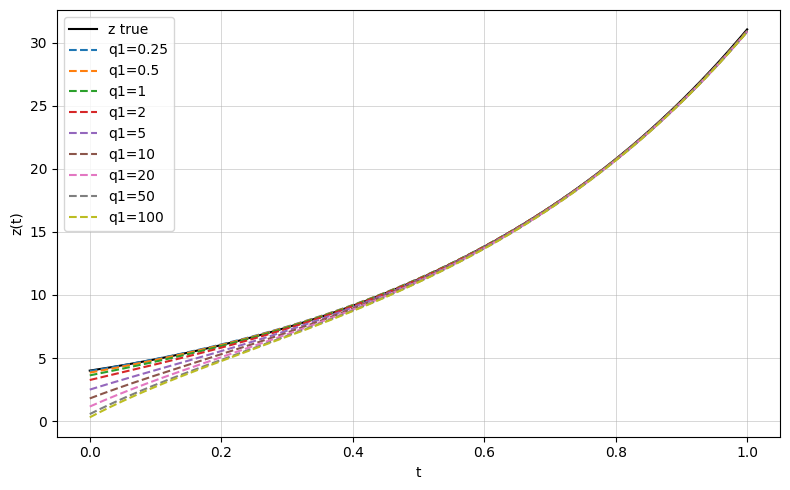

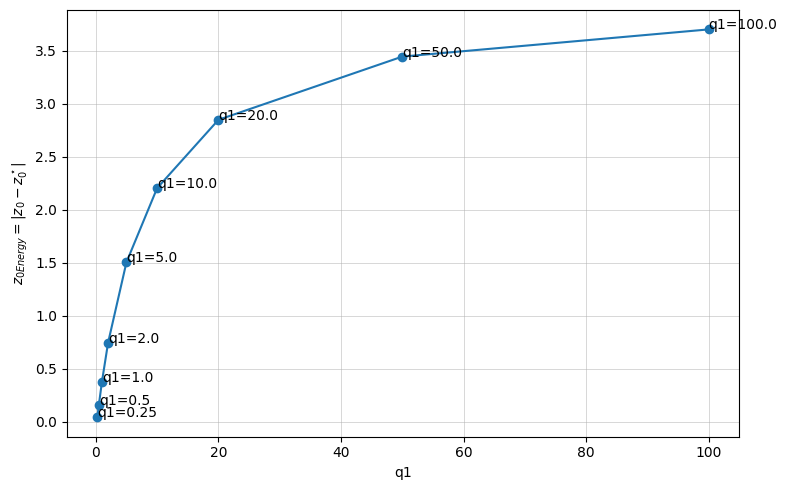

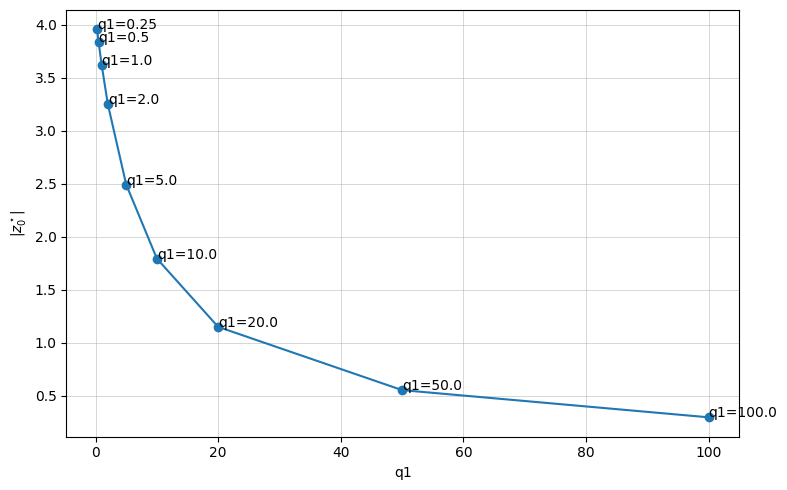

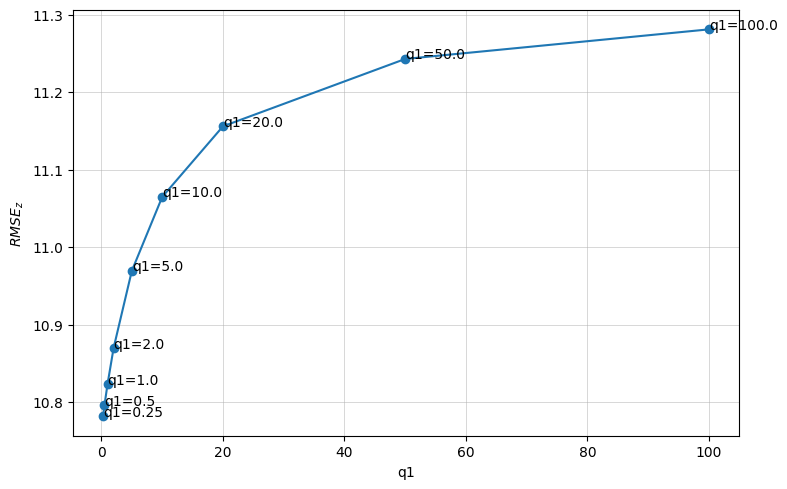

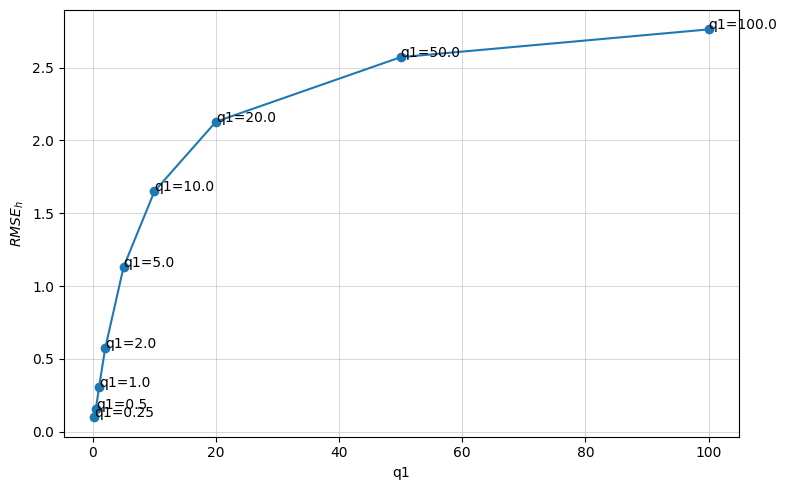

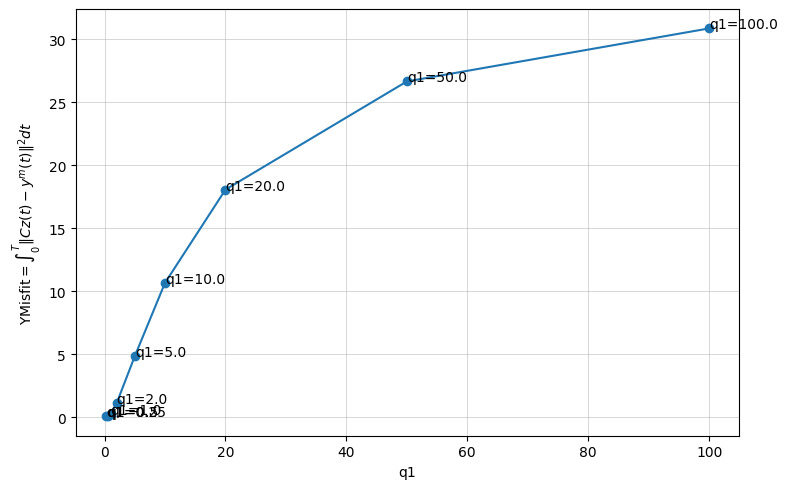

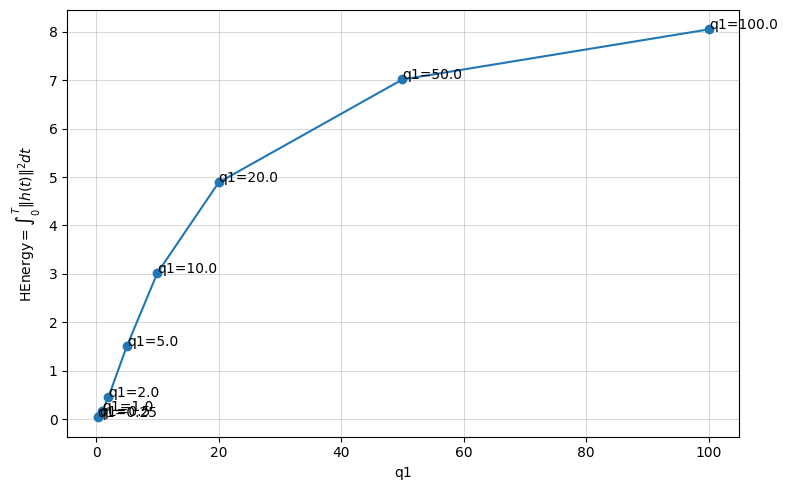

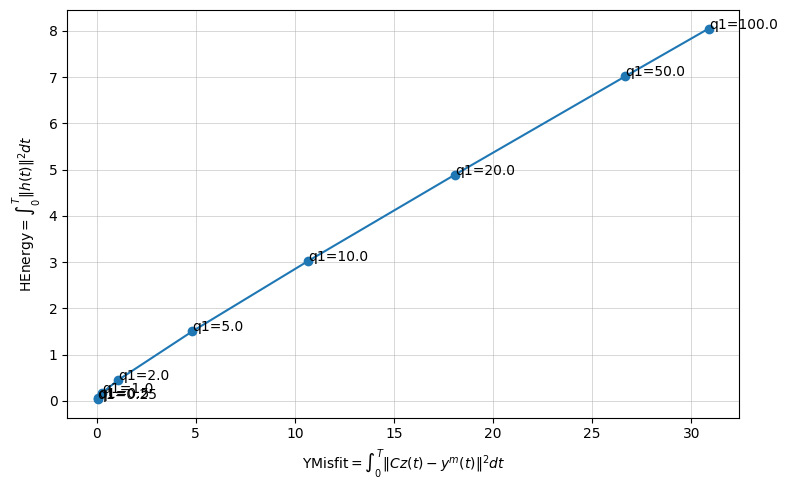

In [10]:
# Sensibility of q1: sweep q1, compute solutions & metrics
q1_list = [0.25, 0.5, 1, 2, 5, 10, 20, 50, 100]
q2 = 10

curves_z, curves_h, metrics = q1_sensibility(A, G2, C, z0, h, T, N, q1_list, q2, save=False, outdir = "figs")

Optimal compromise :
  q1* = 0.001, q2* = 1.0
  z0 error = 0.013
  RMSE(z) = 10.802
  RMSE(h) = 0.112
  Misfit*   = 0.003
  Energy*   = 0.044
  Objective = 0.047


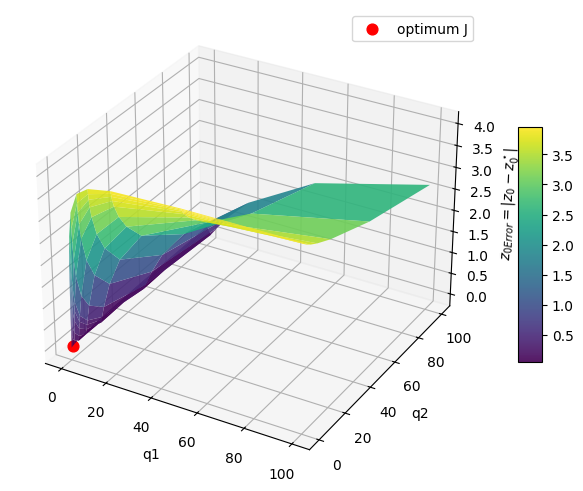

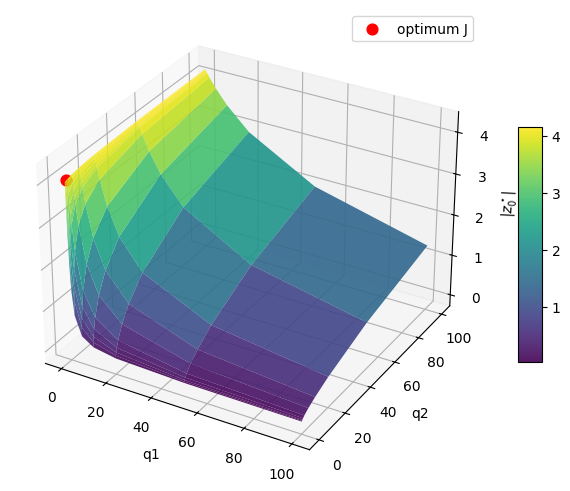

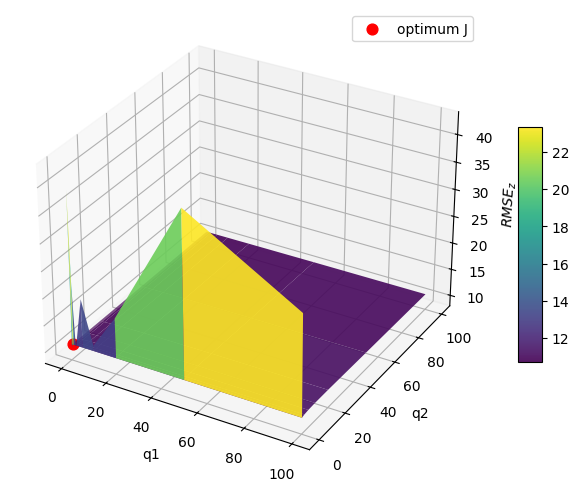

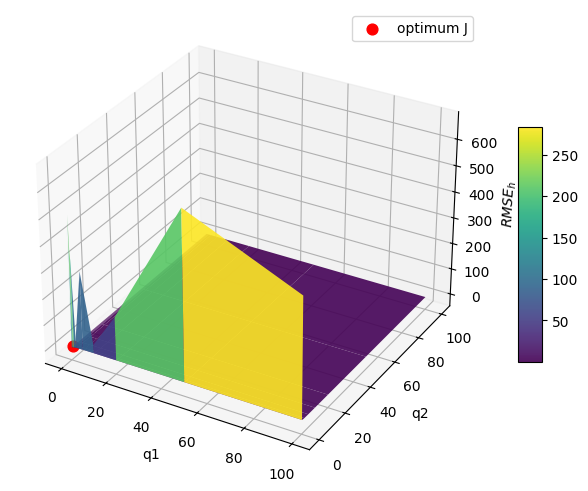

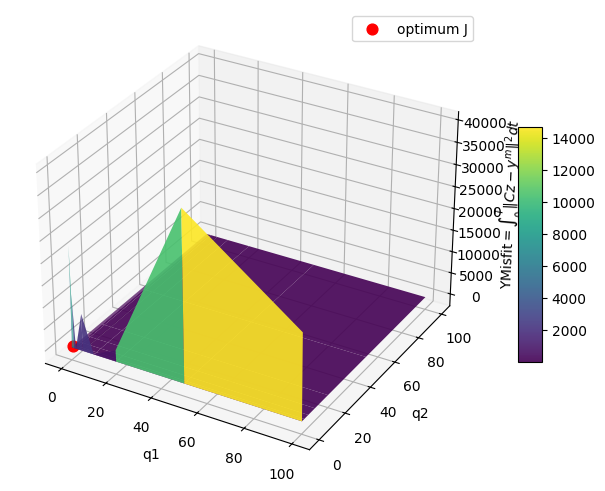

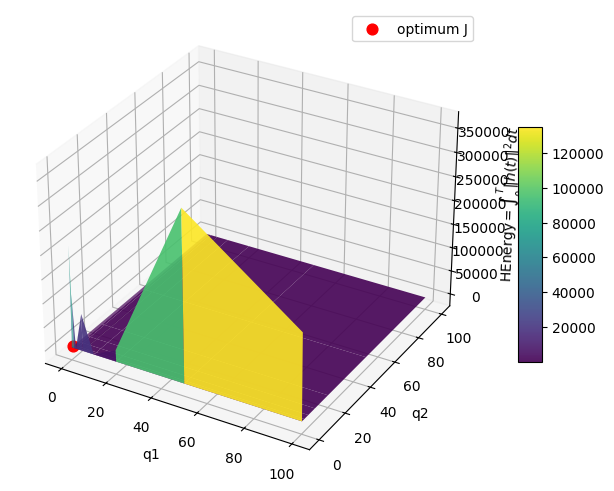

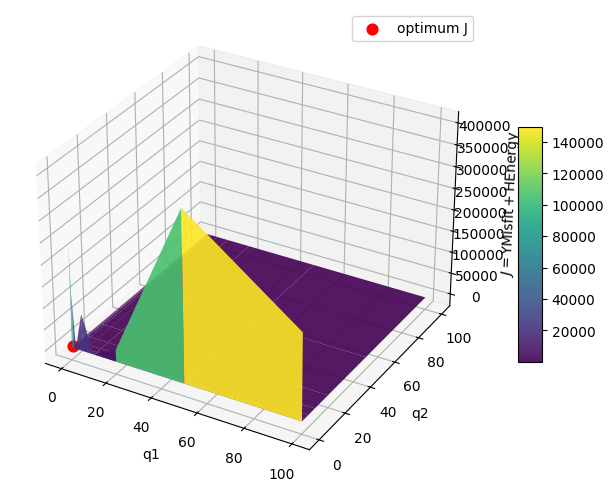

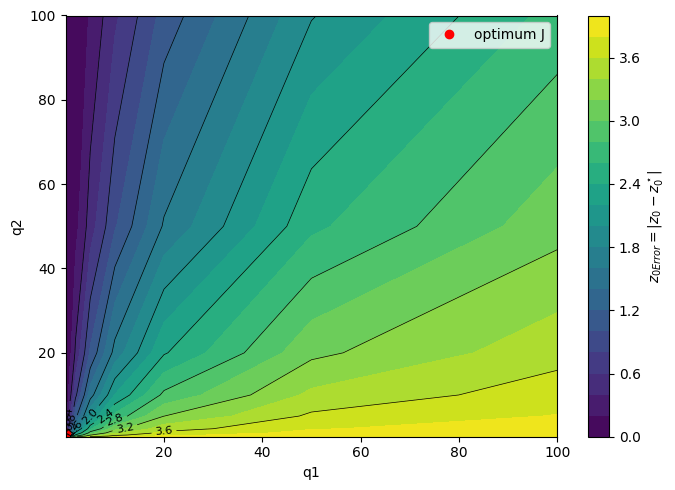

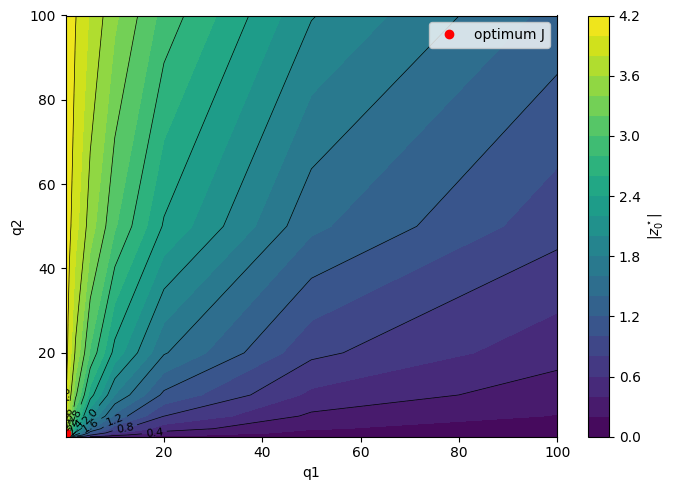

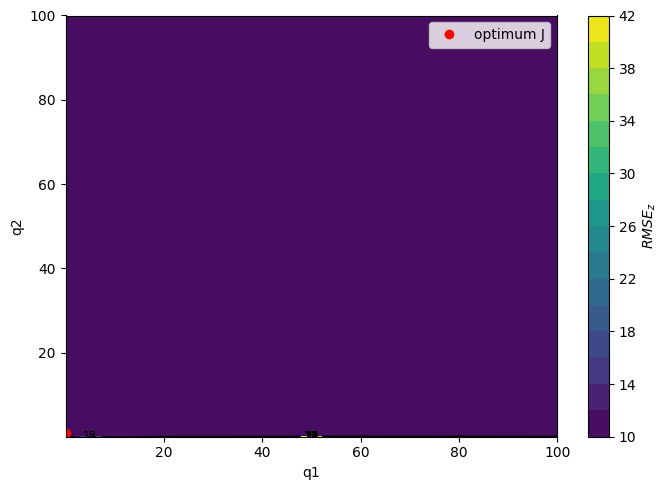

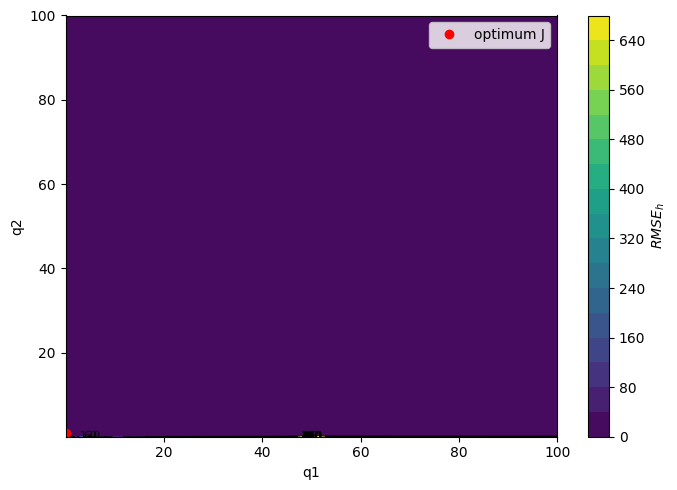

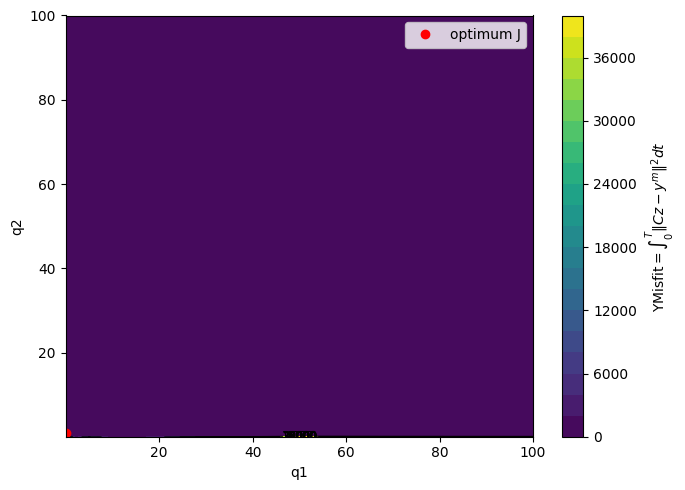

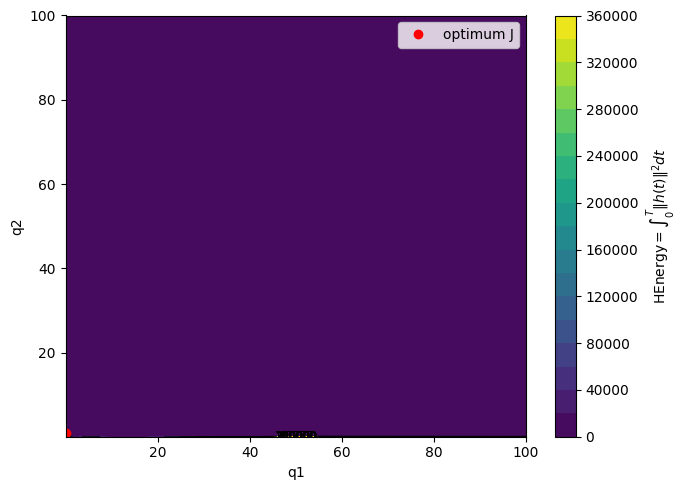

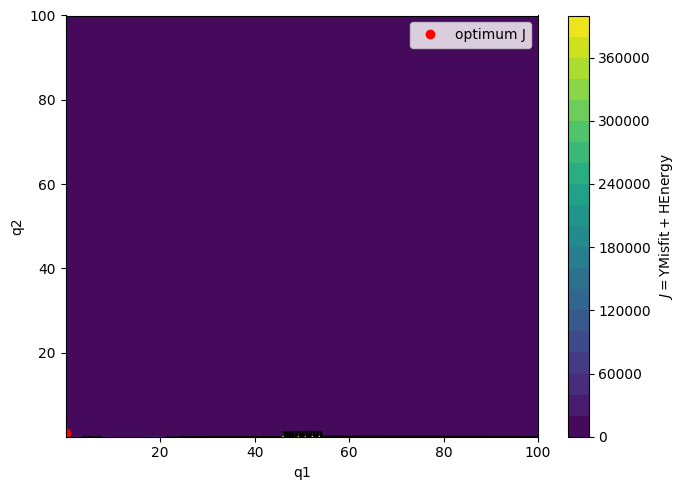

In [11]:
# Sensibility of q1 and q2: sweep q1 and q2, compute solutions & metrics, and search optimum q1 and q2
q1_vals = [0.001, 0.1, 0.25, 0.5, 0.75, 1, 2, 5, 10, 20, 50, 100]
q2_vals = [0.1, 0.25, 0.5, 1, 2, 5, 10, 20, 50, 100]

curves_z, curves_h, metrics, q1_opt, q2_opt = q12_sensibility_with_optimum(A, G2, C, z0, h, T=1, N=200, 
                                                                           q1_list=q1_vals, q2_list=q2_vals, save=False, outdir="figs_3D")

===== Results =====
z0 true = 4, z0 estimated = 4.013, error = 0.013
RMSE(z) = 10.802
RMSE(h) = 0.112
Misfit = 0.003
Energy = 0.044


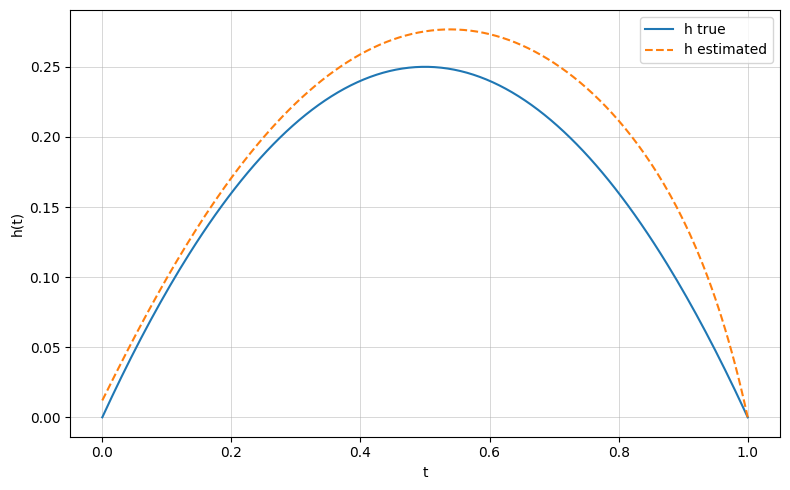

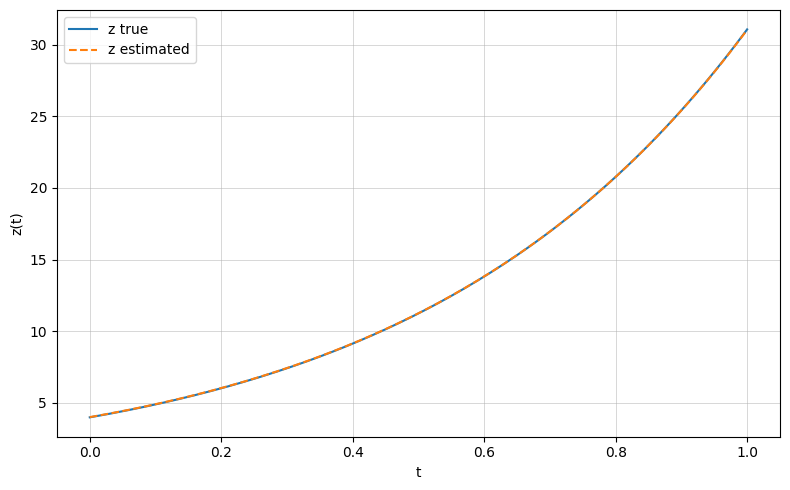

In [12]:
# Simulation for q1_opt and q2_opt (step 1 to 4)
h_true, z_true, y_m, z0_est, z_est, h_est = simulate_n1(A, G2, C, z0, h, T, N, q1_opt, q2_opt)

# Step 5: metrics
z0_error, z0_energy, z_rmse, h_rmse, misfit, energy = compute_metrics(C, z0, h_true, z_true, y_m, z0_est, z_est, h_est, t)
print("===== Results =====")
print(f"z0 true = {z0}, z0 estimated = {z0_est:.3f}, error = {z0_error:.3f}")
print(f"RMSE(z) = {z_rmse:.3f}")
print(f"RMSE(h) = {h_rmse:.3f}")
print(f"Misfit = {misfit:.3f}")
print(f"Energy = {energy:.3f}")

# Step 5: quick plots
plots(h_true, z_true, y_m, z0_est, z_est, h_est, t, save=False, outdir = "figs")